## Import


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from credit_risk_model.data_ingestion import get_connection, load_csvs_to_duckdb
from credit_risk_model.aggregations import run_all_aggregations
from credit_risk_model.data_cleaning import clean_all
from credit_risk_model.feat_eng import engineer_features
from credit_risk_model.config import DATA_PROCESSED, RESULTS_DIR



## Load the data

In [2]:
con = get_connection()
load_csvs_to_duckdb(con)

Loaded: application_train
Loaded: application_test
Loaded: bureau
Loaded: bureau_balance
Loaded: previous_application
Loaded: POS_CASH_balance
Loaded: installments_payments
Loaded: credit_card_balance


In [3]:
# Run aggregations
df = run_all_aggregations(con)

created agg_bureau_balance table
created join_bureau_df table
created agg_credit_card_balance table
created agg_previous_application table
created agg_installments_payments table
created agg_pos_cash_balance table
created agg_application_train table
created agg_main table
Aggregation completed and agg_main table created.


## Basic info

In [4]:
if 'SK_ID_CURR' in df.columns:
    df = df.drop(columns=['SK_ID_CURR'])
    
df.head()

,target,credit_income_ratio,total_income,total_credit_requested,monthly_loan_payment,value_of_goods_financed,age_years,employment_years,NAME_CONTRACT_TYPE,CODE_GENDER,...,avg_amt_credit,approval_rate,n_active_contracts,avg_months_active,n_completed_contracts,avg_payment_ratio,installments_n_late_payments,avg_balance,max_balance,avg_utilization
0,0,2.857143,157500.0,450000.0,35685.0,450000.0,59.309589,12.909589,Cash loans,F,...,443773.607143,0.428571,34.0,-34.794118,5.0,1.056709,2.0,29452.900500,158449.500,NaN
1,0,1.200000,112500.0,135000.0,7879.5,135000.0,48.030137,0.441096,Cash loans,F,...,170367.750000,0.750000,59.0,-26.881356,4.0,1.000000,0.0,0.000000,0.000,0.000000
2,0,6.040000,112500.0,679500.0,19867.5,679500.0,37.117808,5.468493,Cash loans,F,...,145647.750000,0.833333,35.0,-28.428571,3.0,0.897436,7.0,0.000000,0.000,0.000000
3,0,2.900000,225000.0,652500.0,47610.0,652500.0,38.049315,6.347945,Cash loans,M,...,167734.500000,1.000000,24.0,-29.000000,2.0,0.941860,3.0,279583.392414,463463.865,0.759396
4,0,0.733333,135000.0,99000.0,10395.0,99000.0,27.446575,1.038356,Cash loans,F,...,146957.785714,1.000000,49.0,-47.367347,4.0,0.979031,16.0,193191.533710,463813.695,0.674371


In [5]:
df.shape

(307511, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 33 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   target                        307511 non-null  int64  
 1   credit_income_ratio           307511 non-null  float64
 2   total_income                  307511 non-null  float64
 3   total_credit_requested        307511 non-null  float64
 4   monthly_loan_payment          307499 non-null  float64
 5   value_of_goods_financed       307233 non-null  float64
 6   age_years                     307511 non-null  float64
 7   employment_years              307511 non-null  float64
 8   NAME_CONTRACT_TYPE            307511 non-null  object 
 9   CODE_GENDER                   307511 non-null  object 
 10  OCCUPATION_TYPE               211120 non-null  object 
 11  n_loans                       263491 non-null  Int64  
 12  n_active_loans                263491 non-nul

In [7]:
df.describe()

c:\Users\hp\venv\Lib\site-packages\numpy\_core\_methods.py:51: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\hp\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\hp\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,target,credit_income_ratio,total_income,total_credit_requested,monthly_loan_payment,value_of_goods_financed,age_years,employment_years,n_loans,n_active_loans,...,avg_amt_credit,approval_rate,n_active_contracts,avg_months_active,n_completed_contracts,avg_payment_ratio,installments_n_late_payments,avg_balance,max_balance,avg_utilization
count,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,263491.0,263491.000000,...,2.910570e+05,291057.000000,289444.000000,289241.000000,289444.000000,2.916340e+05,291643.000000,86905.000000,8.690500e+04,6.545800e+04
mean,0.080729,3.957570,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,43.936973,-174.835742,5.561196,2.056689,...,1.700700e+05,0.748855,27.012400,-32.083516,2.193419,inf,3.407004,71459.926952,1.445013e+05,inf
std,0.272419,2.689728,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,11.956133,387.056895,4.377897,1.787834,...,1.657372e+05,0.262332,22.516351,20.269684,3.136831,NaN,6.397206,109056.518226,1.728090e+05,NaN
min,0.000000,0.004808,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,20.517808,-1000.665753,1.0,0.000000,...,0.000000e+00,0.000000,0.000000,-96.000000,0.000000,3.333333e-01,0.000000,-2930.232558,0.000000e+00,-2.560026e-03
25%,0.000000,2.018667,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,34.008219,0.791781,2.0,1.000000,...,6.684943e+04,0.500000,11.000000,-44.454545,1.000000,9.538462e-01,0.000000,0.000000,0.000000e+00,0.000000e+00
50%,0.000000,3.265067,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,43.150685,3.323288,4.0,2.000000,...,1.174500e+05,0.800000,20.000000,-28.658537,2.000000,1.000000e+00,1.000000,26793.606316,9.742432e+04,2.623820e-01
75%,0.000000,5.159880,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,53.923288,7.561644,8.0,3.000000,...,2.160720e+05,1.000000,36.000000,-15.500000,3.000000,1.000000e+00,4.000000,98610.502500,1.951825e+05,6.447832e-01
max,1.000000,84.736842,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,69.120548,49.073973,116.0,32.000000,...,4.050000e+06,1.000000,271.000000,-1.000000,85.000000,inf,159.000000,928686.323571,1.354829e+06,inf


## missing values

In [8]:
df.isna().sum().sort_values(ascending=False).head(20)


avg_utilization          242053
max_balance              220606
avg_balance              220606
max_late_single_loan     215280
pct_months_late          215280
total_late_months        215280
OCCUPATION_TYPE           96391
avg_debt_ratio            88979
total_debt                51380
n_active_loans            44020
n_loans                   44020
avg_months_active         18270
n_active_contracts        18067
n_completed_contracts     18067
n_refused                 16454
n_prev_apps               16454
approval_rate             16454
n_approved                16454
avg_amt_credit            16454
avg_amt_applied           16454
dtype: int64

## Statistics

In [9]:
df.describe().T

c:\Users\hp\venv\Lib\site-packages\numpy\_core\_methods.py:51: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
c:\Users\hp\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
c:\Users\hp\venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,count,mean,std,min,25%,50%,75%,max
target,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
credit_income_ratio,307511.0,3.95757,2.689728,0.004808,2.018667,3.265067,5.15988,84.736842
total_income,307511.0,168797.919297,237123.146279,25650.0,112500.0,147150.0,202500.0,117000000.0
total_credit_requested,307511.0,599025.999706,402490.776996,45000.0,270000.0,513531.0,808650.0,4050000.0
monthly_loan_payment,307499.0,27108.573909,14493.737315,1615.5,16524.0,24903.0,34596.0,258025.5
value_of_goods_financed,307233.0,538396.207429,369446.46054,40500.0,238500.0,450000.0,679500.0,4050000.0
age_years,307511.0,43.936973,11.956133,20.517808,34.008219,43.150685,53.923288,69.120548
employment_years,307511.0,-174.835742,387.056895,-1000.665753,0.791781,3.323288,7.561644,49.073973
n_loans,263491.0,5.561196,4.377897,1.0,2.0,4.0,8.0,116.0
n_active_loans,263491.0,2.056689,1.787834,0.0,1.0,2.0,3.0,32.0


## Target variable EDA

In [27]:
df['target'].value_counts(normalize=True)

target
0    0.919271
1    0.080729
Name: proportion, dtype: float64

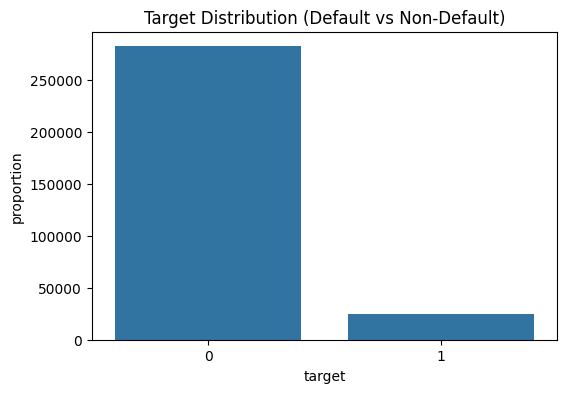

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['target'])
plt.title("Target Distribution (Default vs Non-Default)")
plt.xlabel("target")
plt.ylabel("proportion")
plt.savefig(f"{RESULTS_DIR}/figures/EDA/target_dist.png", dpi=120)
plt.show()


### Numeric distributions (histograms)

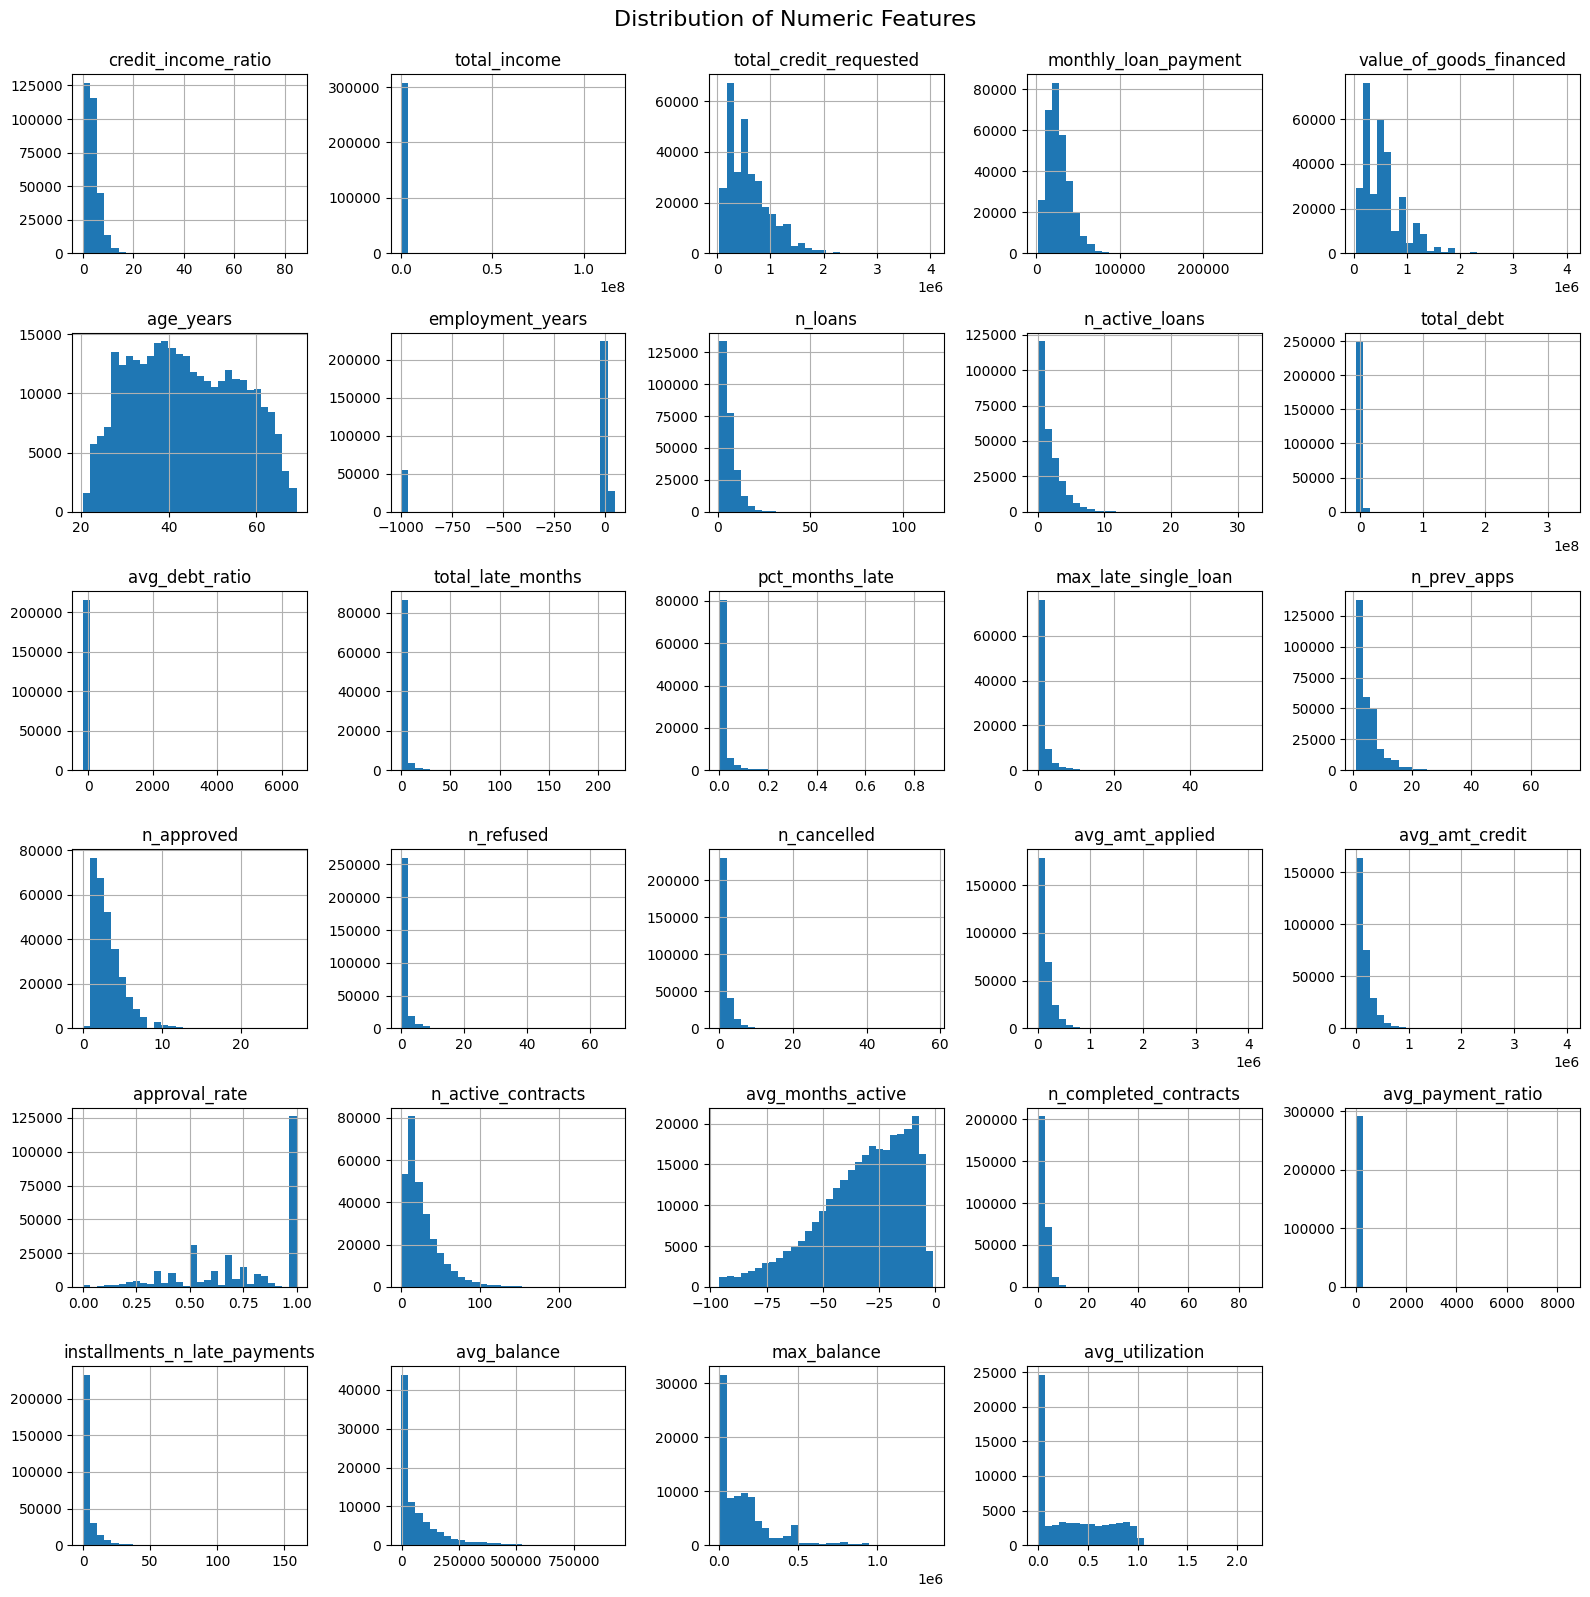

In [12]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('target')
df[num_cols] = df[num_cols].replace([np.inf, -np.inf], np.nan)
df[num_cols].hist(figsize=(16, 16), bins=30)
plt.suptitle('Distribution of Numeric Features', fontsize=16, y=0.995)
plt.tight_layout()
plt.savefig(f"{RESULTS_DIR}/figures/EDA/numeric_histograms.png", dpi=120)
plt.show()

## Boxplots for outliers

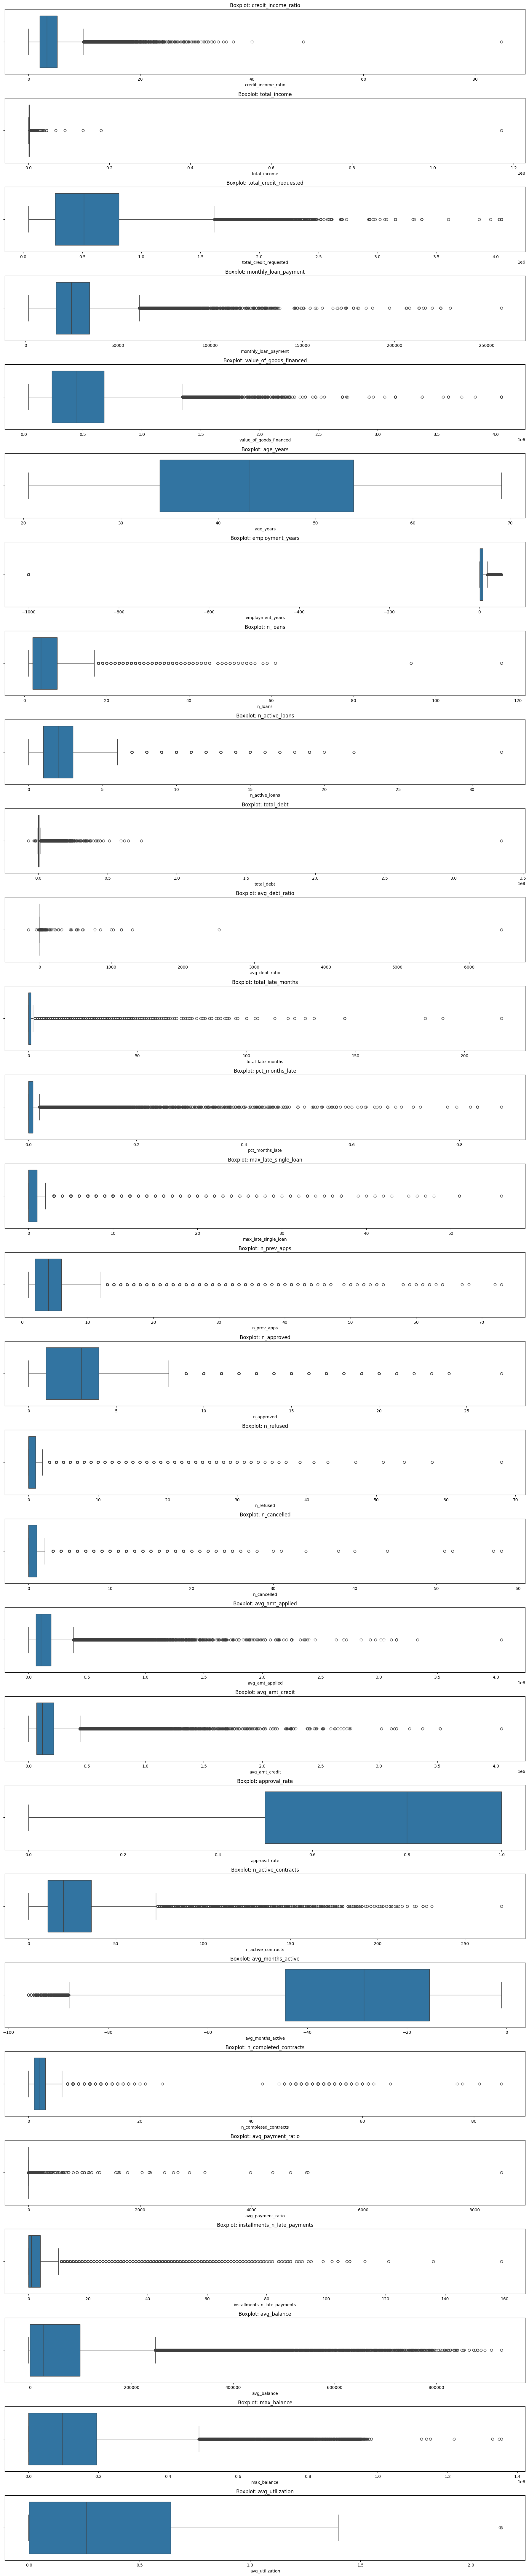

In [13]:
plt.figure(figsize=(18, len(num_cols) * 3))

for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot: {col}')

plt.tight_layout()
plt.savefig(f"{RESULTS_DIR}/figures/EDA/numeric_boxplots.png", dpi=120)
plt.show()

## Correlation matrix

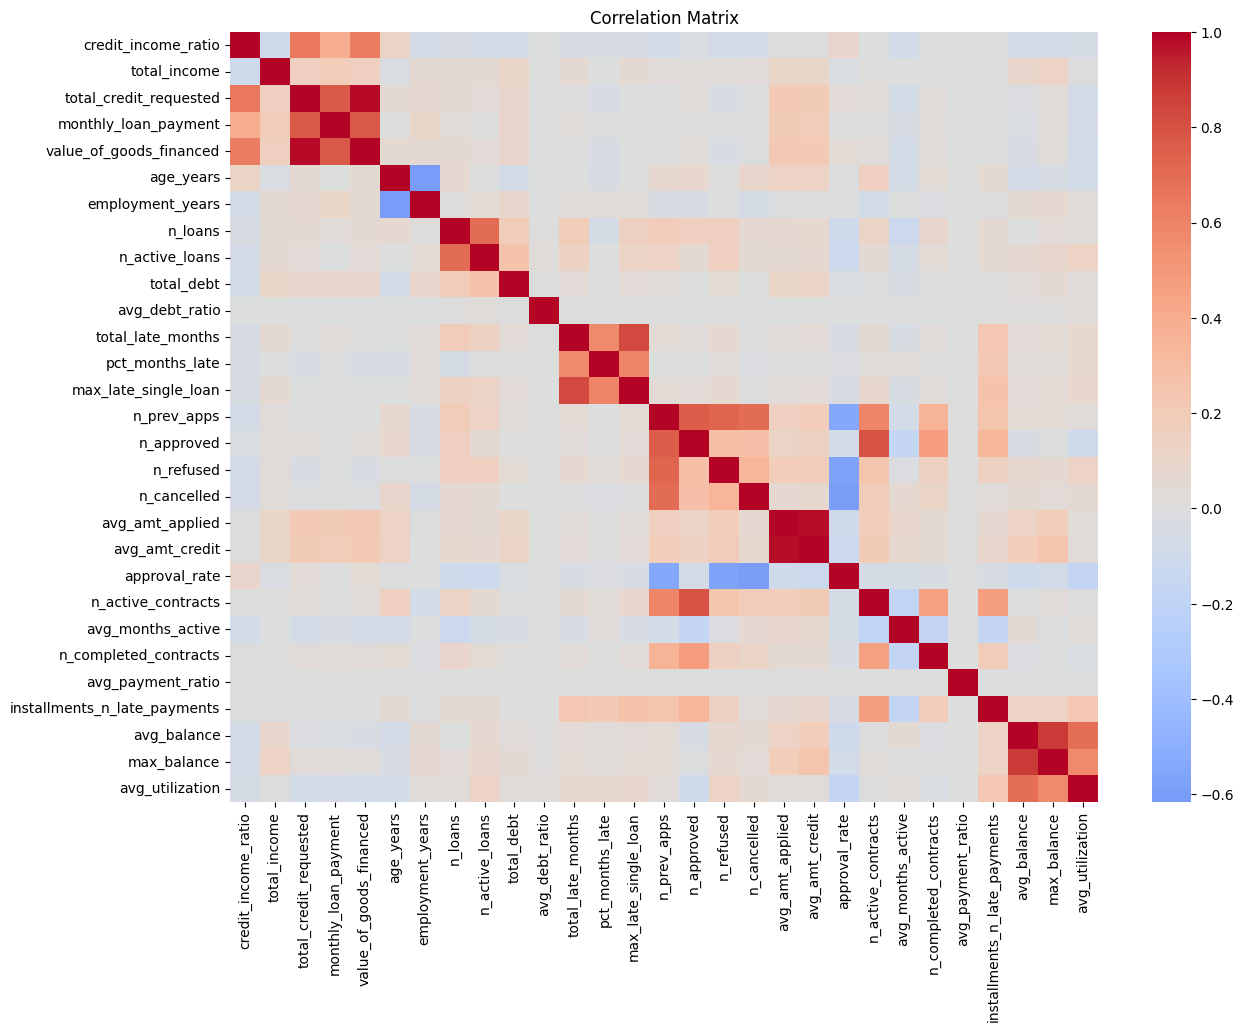

In [14]:
plt.figure(figsize=(14, 10))
corr = df[num_cols].corr()
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.savefig(f"{RESULTS_DIR}/figures/EDA/correlation_matrix.png", dpi=120)
plt.show()


## Top correlations with TARGET

In [15]:
num_data = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[num_data].corr()
target_corr = corr["target"].sort_values(ascending=False)
target_corr

target                          1.000000
avg_utilization                 0.156107
avg_balance                     0.087177
max_balance                     0.068798
n_active_loans                  0.067128
n_refused                       0.064469
pct_months_late                 0.061479
employment_years                0.044932
avg_months_active               0.033453
installments_n_late_payments    0.030446
max_late_single_loan            0.027124
total_late_months               0.025571
n_prev_apps                     0.019762
n_cancelled                     0.019031
total_debt                      0.006813
n_loans                         0.004056
avg_debt_ratio                  0.002042
avg_payment_ratio               0.001366
total_income                   -0.003982
credit_income_ratio            -0.007727
monthly_loan_payment           -0.012817
avg_amt_credit                 -0.016114
n_completed_contracts          -0.019547
avg_amt_applied                -0.021803
total_credit_req

## Missing Value Patterns

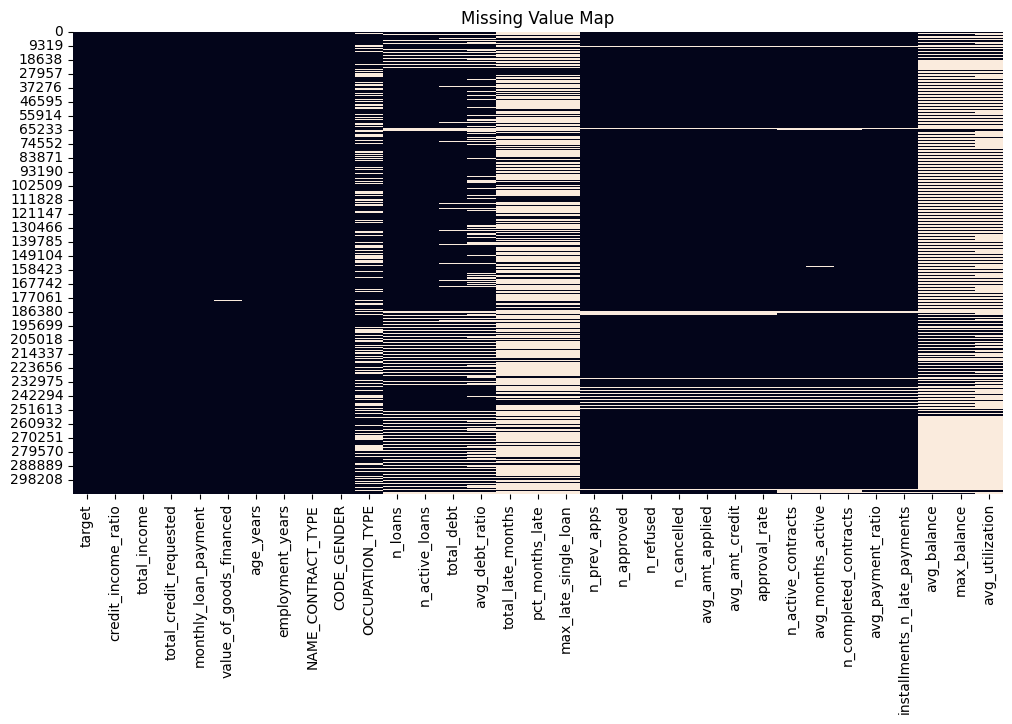

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Value Map")
plt.savefig(f"{RESULTS_DIR}/figures/EDA/missing_value_map.png", dpi=120)
plt.show()


## Categorical analysis

In [20]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
cat_cols

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'OCCUPATION_TYPE'], dtype='object')

### Value counts:

In [21]:
for col in cat_cols:
    display(df[col].value_counts())
    print("\n\n")

NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

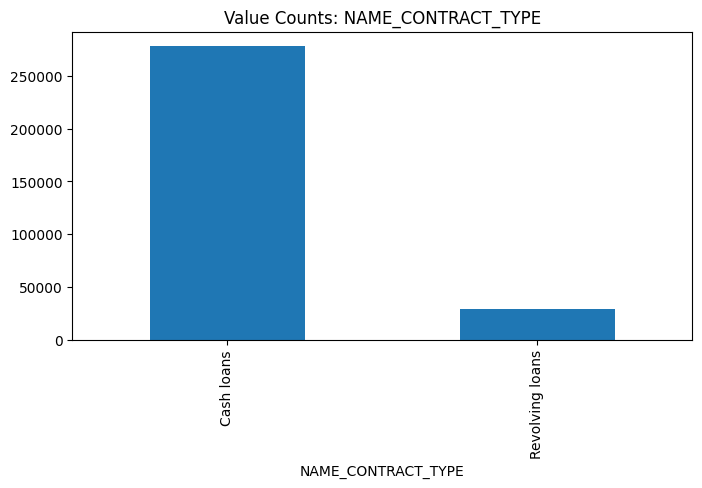

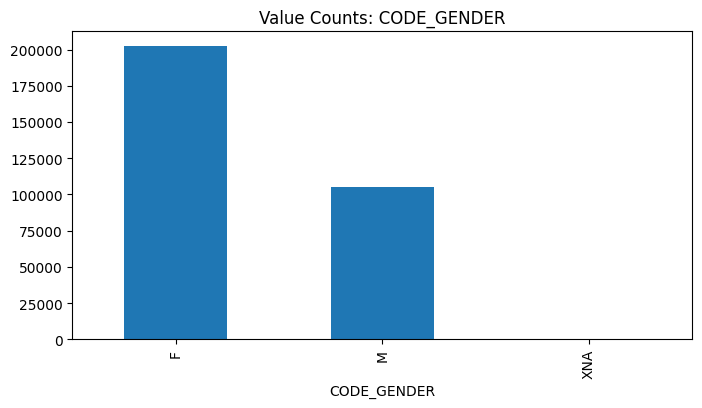

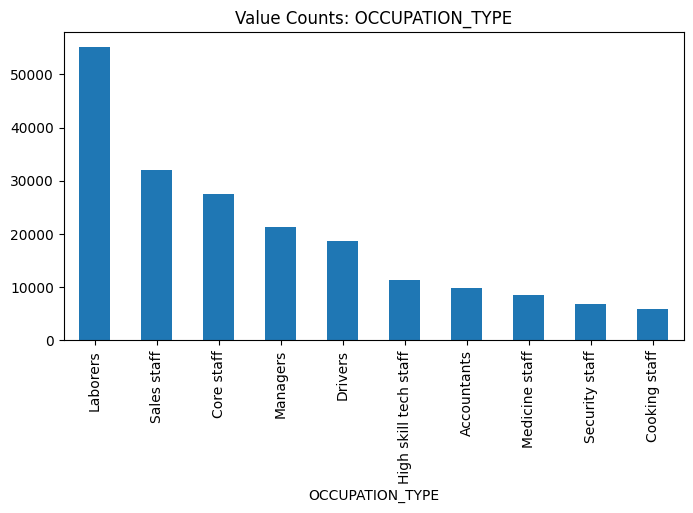

In [22]:
for col in cat_cols:
    plt.figure(figsize=(8,4))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Value Counts: {col}")
    plt.savefig(f"{RESULTS_DIR}/figures/EDA/{col}_value_counts.png", dpi=120)
    plt.show()

## Category vs TARGET

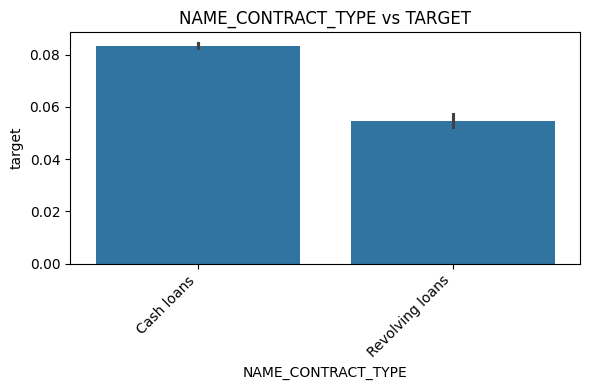

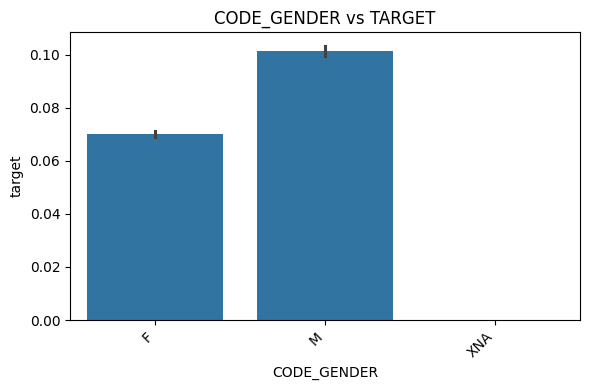

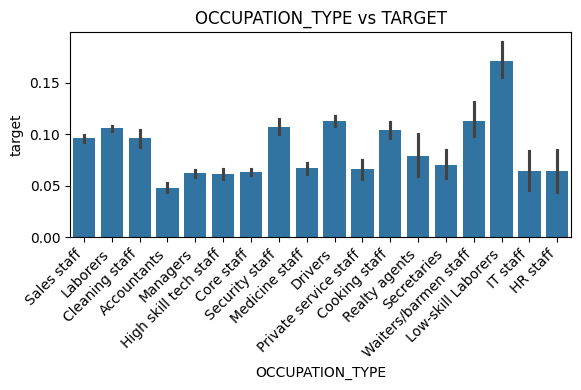

In [25]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.barplot(x=df[col], y=df['target'])
    plt.title(f"{col} vs TARGET")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f"{RESULTS_DIR}/figures/EDA/{col}_target_relationship.png", dpi=120)
    plt.show()

## Save Raw Model

In [17]:

df.to_csv(DATA_PROCESSED/"agg_main.csv", index=False)